Continuation of the Analytical example I wrote a year ago. Wanted to lay down some extra practical writing too

Linear Regression Loss on Original Data: 112.9565847476831
Linear Regression Loss on New Data: 1089.9367782504519 

Polynomial Regression Loss on Original Data: 20.989259605068746
Polynomial Regression Loss on New Data: 31224.96386489498


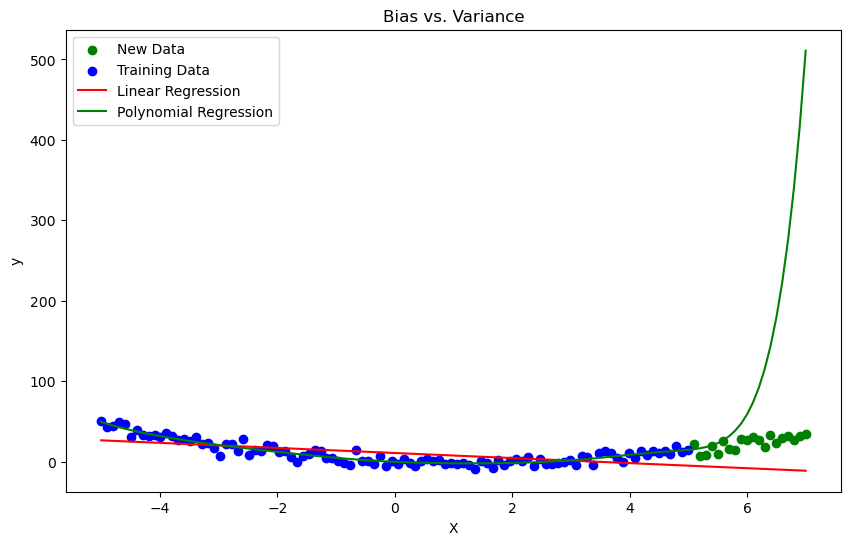

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Generate synthetic dataset
np.random.seed(0)
X = np.linspace(-5, 5, 100).reshape(-1, 1)  # Input variable
y_true = X**2 - 3*X + 2  # Target variable with a polynomial relationship
noise = np.random.normal(0, 5, size=X.shape)  # Add random noise
y = y_true + noise

# Fit a linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X, y)

# Fit a polynomial regression model
poly_reg = PolynomialFeatures(degree=10)  # Higher degree for increased complexity
X_poly = poly_reg.fit_transform(X)
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly, y)

# Generate additional data points
X_additional = np.linspace(5.1, 7, 20).reshape(-1, 1)
y_additional_true = X_additional**2 - 3*X_additional + 2
noise_additional = np.random.normal(0, 5, size=X_additional.shape)
y_additional = y_additional_true + noise_additional

# Compute predictions and total loss
og_pred = linear_reg.predict(X)
og_poly_pred = poly_reg_model.predict(X_poly)
y_linear_pred = linear_reg.predict(X_additional)
y_poly_pred = poly_reg_model.predict(poly_reg.transform(X_additional))
linear_loss = mean_squared_error(y_additional, y_linear_pred)
poly_loss = mean_squared_error(y_additional, y_poly_pred)
og_loss = mean_squared_error(y, og_pred)
og_poly_loss = mean_squared_error(y, og_poly_pred)

print("Linear Regression Loss on Original Data:", og_loss)
print("Linear Regression Loss on New Data:", linear_loss,'\n')

print("Polynomial Regression Loss on Original Data:", og_poly_loss)
print("Polynomial Regression Loss on New Data:", poly_loss)


all_x = np.append(X,X_additional).reshape(-1, 1)
all_x_sq = poly_reg.fit_transform(all_x)

# Plotting the data and the models
plt.figure(figsize=(10, 6))
plt.scatter(X_additional, y_additional, color='g', label='New Data')
plt.scatter(X, y, color='b', label='Training Data')
plt.plot(all_x, linear_reg.predict(all_x), color='r', label='Linear Regression')
plt.plot(all_x, poly_reg_model.predict(all_x_sq), color='g', label='Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Bias vs. Variance')
plt.show()




## Bias and Variance

Bias and variance are two important concepts in machine learning that help us understand the behavior and performance of models.

### Bias:

Bias refers to the error introduced by approximating a real-world problem with a simplified model. It measures how far off the predictions of the model are from the true values.
A model with high bias oversimplifies the underlying relationships in the data and tends to underfit. It fails to capture the complexities and nuances in the data, resulting in systematic errors and poor performance. High bias is often associated with models that are too simple or have strong assumptions about the data.

### Variance:

Variance refers to the variability or sensitivity of a model's predictions to fluctuations in the training data. It measures how much the predictions of the model vary when trained on different subsets of the data.
A model with high variance is overly sensitive to the training data and tends to overfit. It captures the noise or random fluctuations in the training data, leading to poor generalization performance on unseen data. High variance is often associated with complex models that can fit the training data closely but struggle to generalize to new examples.

### Bias-Variance Trade-off:

Bias and variance are two sources of error in a model, and there is often a trade-off between them.
Increasing the complexity of a model (e.g., adding more parameters or increasing the model capacity) can help reduce bias, allowing the model to capture more intricate patterns in the data. However, this increase in complexity can also lead to higher variance as the model becomes more sensitive to the training data.
Conversely, reducing the complexity of a model can help decrease variance, making it less sensitive to the training data. However, this reduction in complexity can increase bias, limiting the model's ability to capture the underlying relationships accurately.
The goal is to strike a balance that minimizes both bias and variance, leading to a model that generalizes well to unseen data.
In summary, bias represents the model's tendency to make systematic errors and underfit the data, while variance represents the model's sensitivity to fluctuations in the training data and its tendency to overfit. The bias-variance trade-off highlights the need to find an optimal model complexity that minimizes both sources of error.